In [1]:
"""
    This notebook is used to generate the figures for the following section:
    "Results"
"""

'\n    This notebook is used to generate the figures for the following section:\n    "Results"\n'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
r = [2, 4, 8, 16, 32, 48, 64]
v = [3.926, 2.964, 2.596, 1.979, 1.633, 1.935, 1.721]
p = [ 2494,  4984,  9964, 19924, 39844, 59764, 79684]

Index(['g_s', 'g_u', 'g_s_hat', 'g_u_hat', 'f_spiking', 'f_intra_bursting',
       'f_inter_bursting', 'duration_bursting', 'nbr_spikes_bursting', 'label',
       'f_spiking_hat', 'f_intra_bursting_hat', 'f_inter_bursting_hat',
       'duration_bursting_hat', 'nbr_spikes_bursting_hat', 'label_hat',
       'L_dics', 'sigma_s', 'sigma_u'],
      dtype='object')
10649


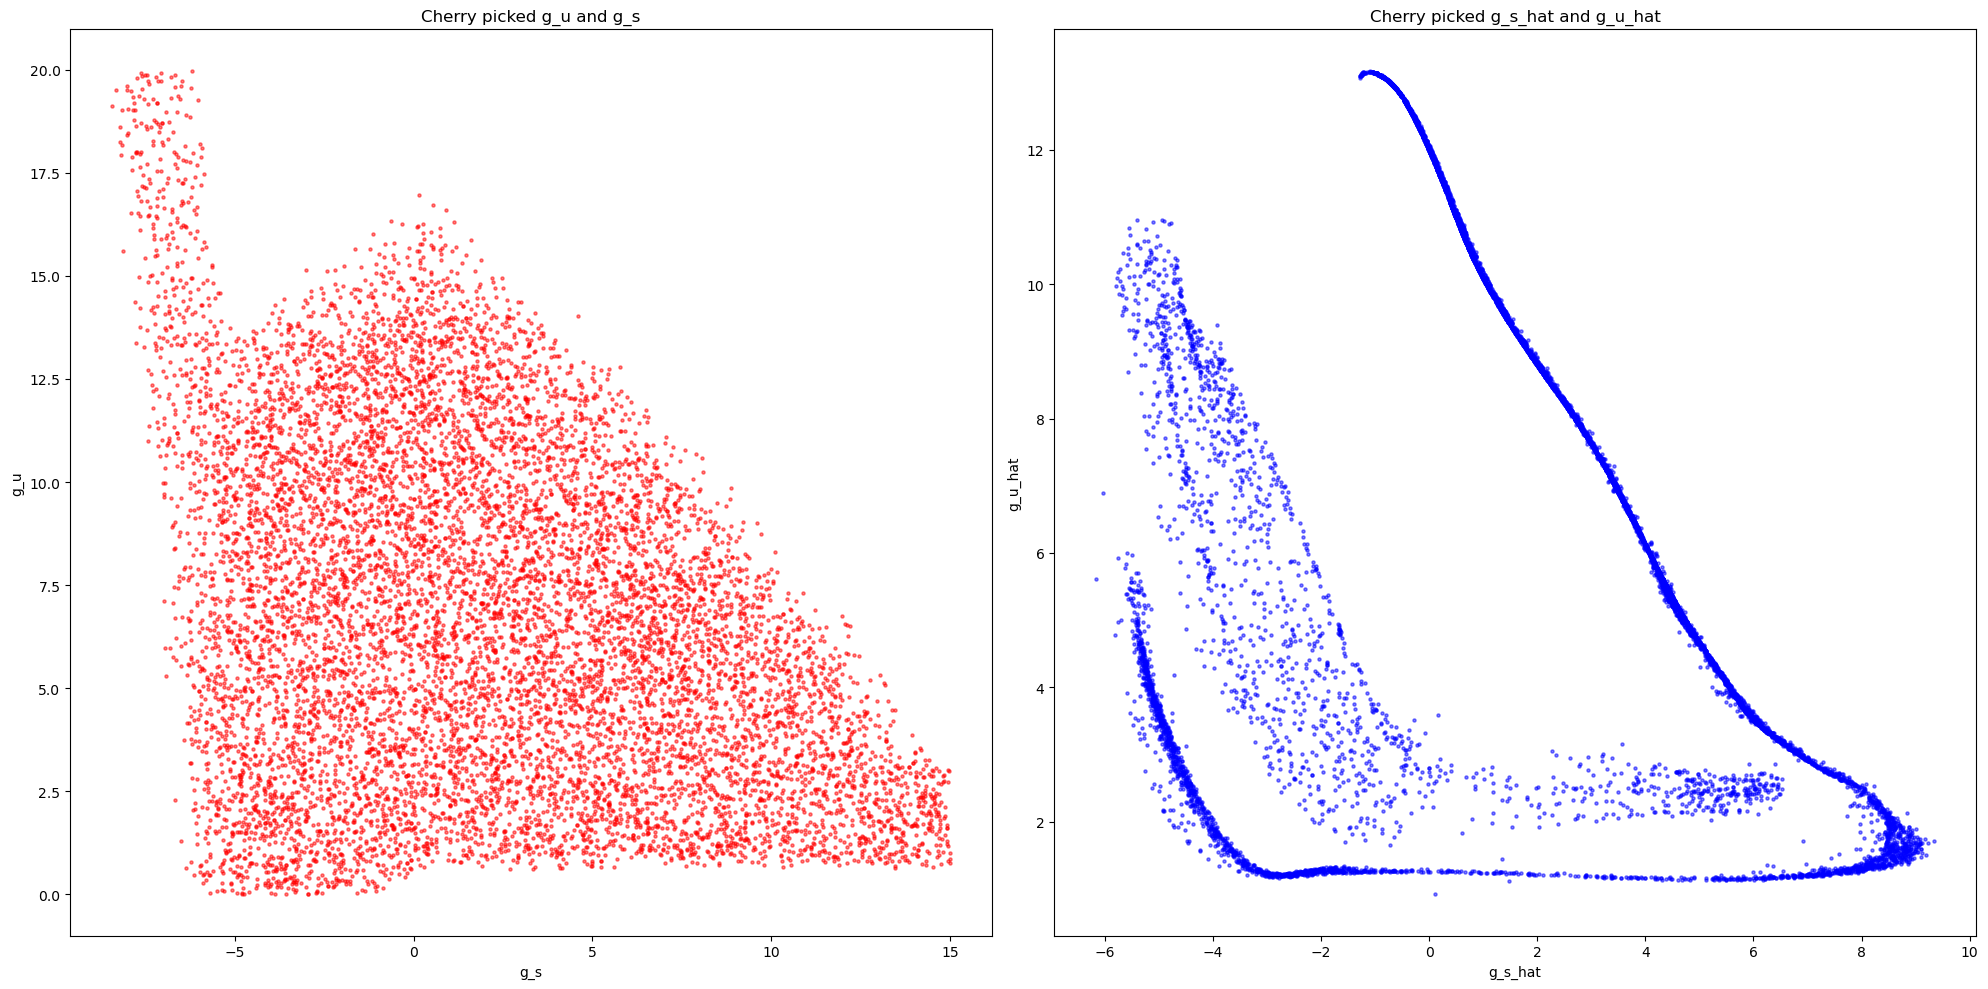

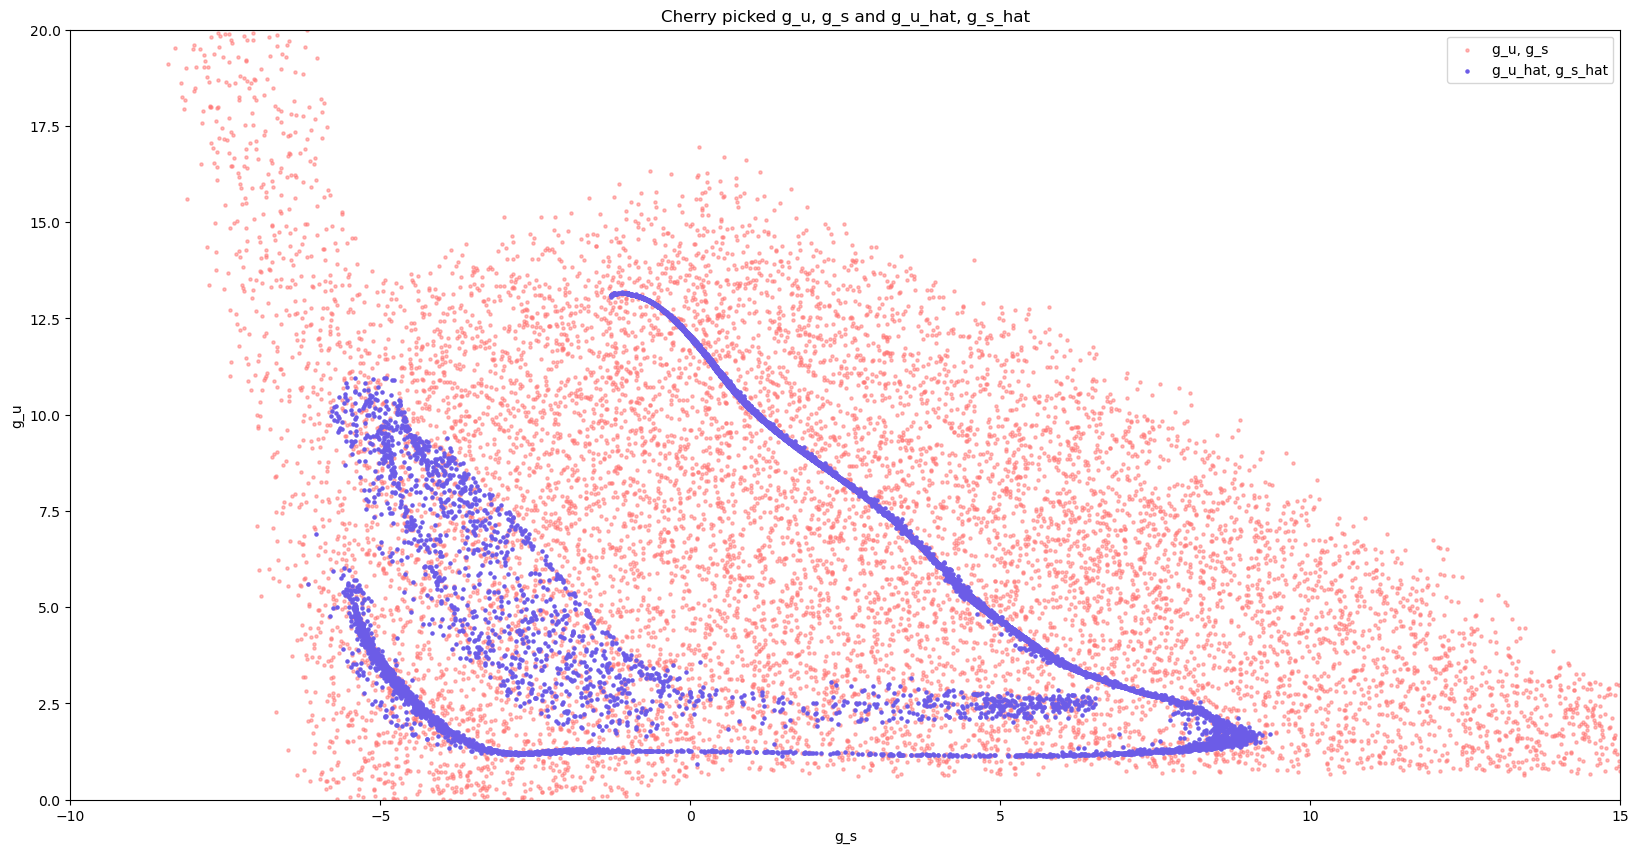

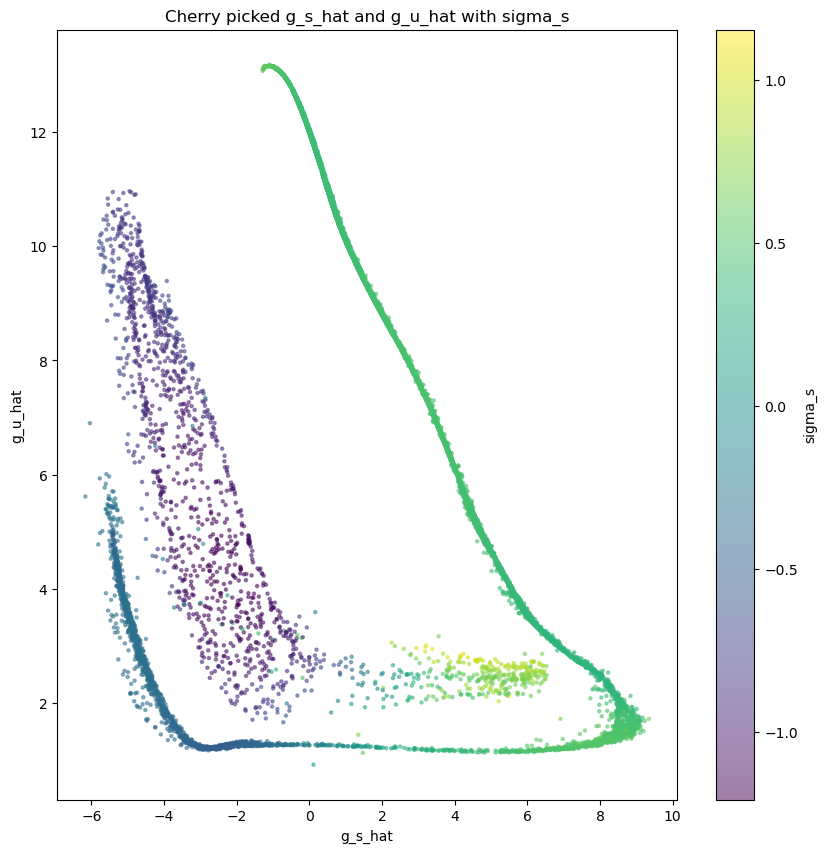

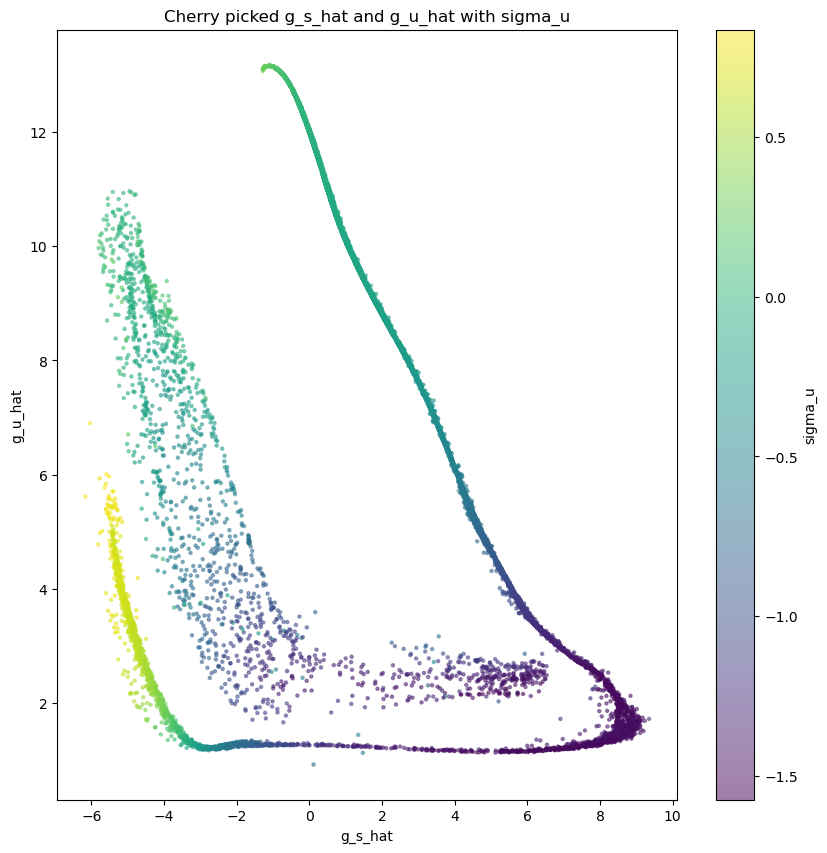

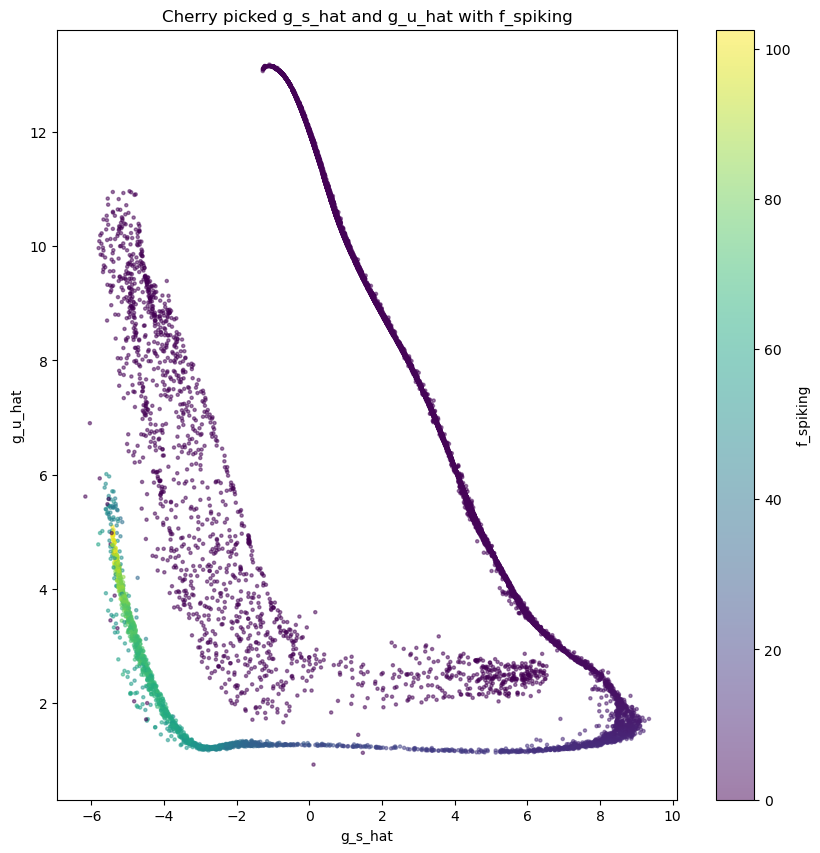

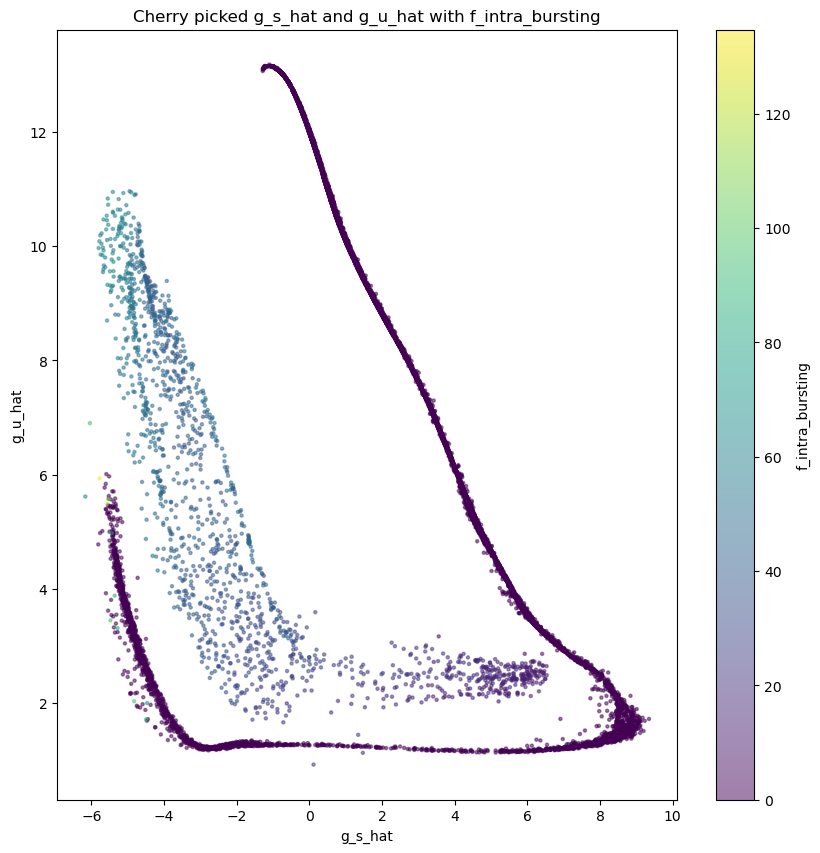

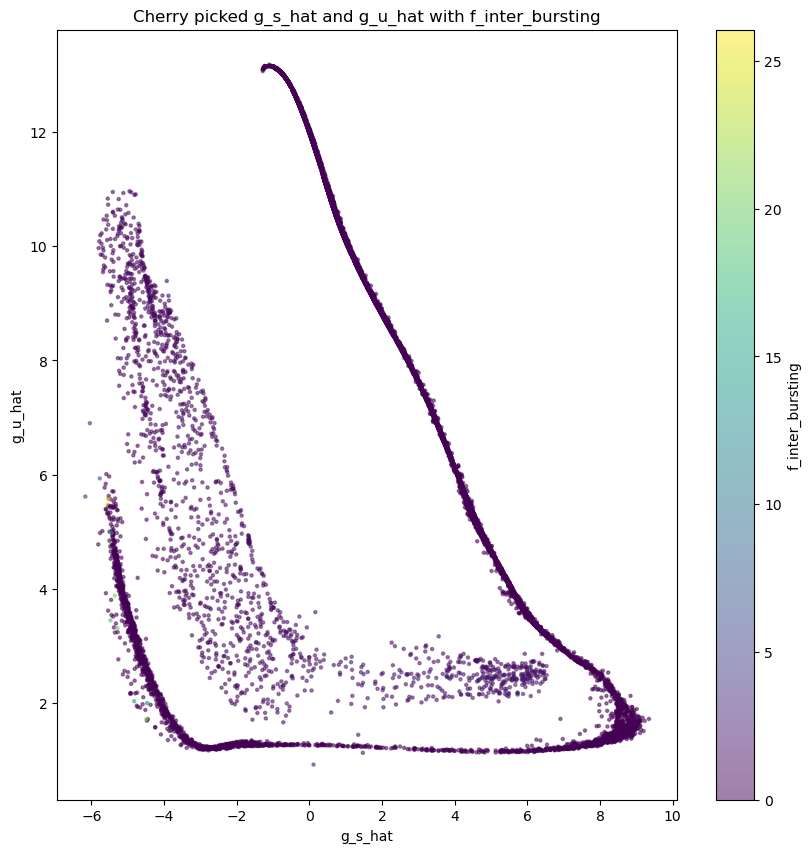

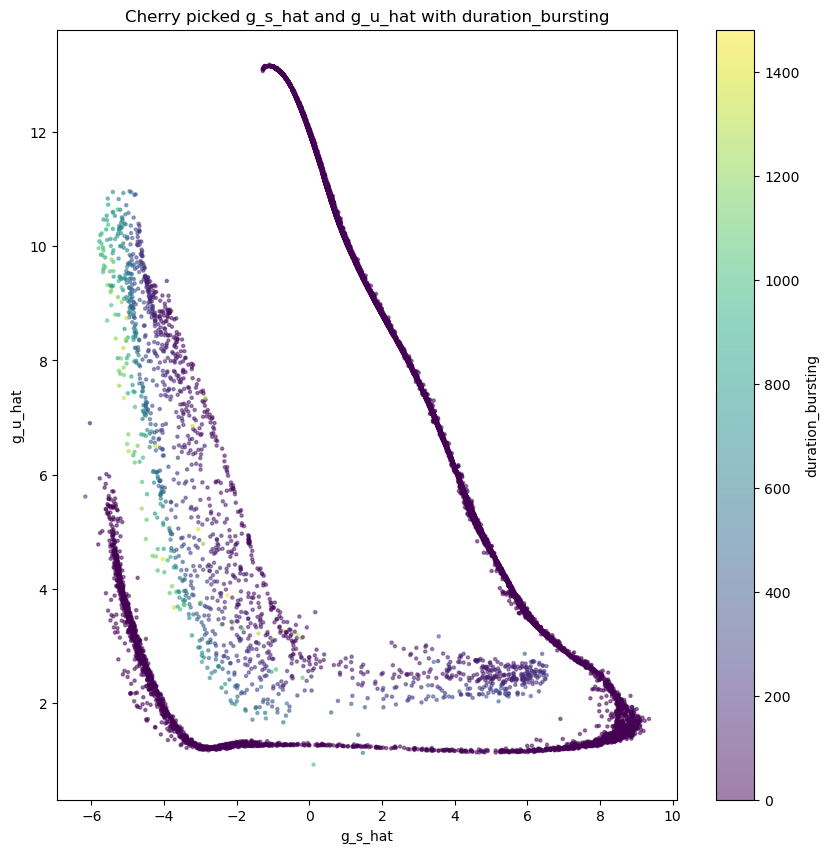

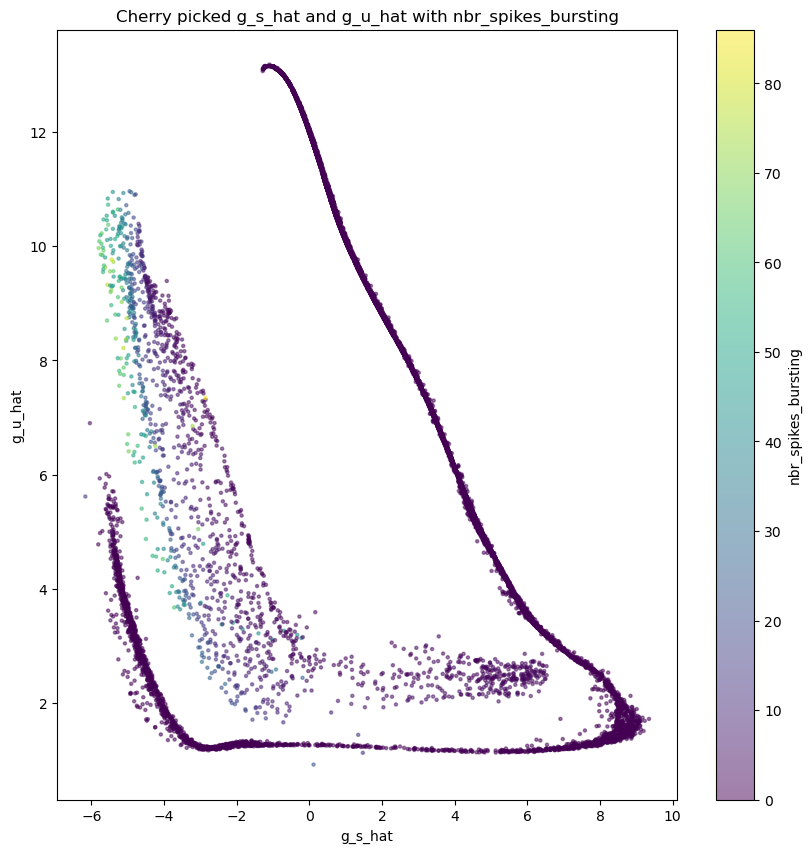

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
path_cherry = "tmp/cherry_picked_g_s_g_u_da.csv"
cherry_picked = pd.read_csv(path_cherry)
print(cherry_picked.columns)
print(len(cherry_picked))

# Create subplots for initial comparison
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Scatter plot of g_u vs g_s
axes[0].scatter(cherry_picked['g_s'], cherry_picked['g_u'], c='red', s=5, alpha=0.5)
axes[0].set_xlabel('g_s')
axes[0].set_ylabel('g_u')
axes[0].set_title('Cherry picked g_u and g_s')

# Scatter plot of g_s_hat vs g_u_hat
axes[1].scatter(cherry_picked['g_s_hat'], cherry_picked['g_u_hat'], c='blue', s=5, alpha=0.5)
axes[1].set_xlabel('g_s_hat')
axes[1].set_ylabel('g_u_hat')
axes[1].set_title('Cherry picked g_s_hat and g_u_hat')

plt.tight_layout()
plt.show()

# Combined plot with connection lines
plt.figure(figsize=(20, 10))
plt.scatter(cherry_picked['g_s'], cherry_picked['g_u'], c='#ff7675', s=5, alpha=0.5, label='g_u, g_s')
plt.scatter(cherry_picked['g_s_hat'], cherry_picked['g_u_hat'], c='#6c5ce7', s=5, alpha=1, label='g_u_hat, g_s_hat')
plt.xlabel('g_s')
plt.ylabel('g_u')
plt.title('Cherry picked g_u, g_s and g_u_hat, g_s_hat')
plt.legend()
plt.xlim(-10, 15)
plt.ylim(0, 20)
# save as svg
plt.savefig('figures/cherry_picked_g_s_g_u_da.svg', format='svg', dpi=300)
plt.show()

# List of features to color by
features = [
    'sigma_s', 'sigma_u', 'f_spiking', 'f_intra_bursting', 
    'f_inter_bursting', 'duration_bursting', 'nbr_spikes_bursting'
]

# Generate scatter plots colored by each feature
for feature in features:
    if feature in cherry_picked.columns:
        plt.figure(figsize=(10, 10))
        sc = plt.scatter(
            cherry_picked['g_s_hat'], cherry_picked['g_u_hat'],
            c=cherry_picked[feature], cmap='viridis', s=5, alpha=0.5
        )
        plt.colorbar(sc, label=feature)
        plt.xlabel('g_s_hat')
        plt.ylabel('g_u_hat')
        plt.title(f'Cherry picked g_s_hat and g_u_hat with {feature}')
        # Uncomment to save if needed:
        plt.show()
    else:
        print(f"Column {feature} not found in dataset.")


In [5]:
path_cherry_total = "tmp/cherry_picked_g_s_g_u_total_da.csv"
cherry_picked_total = pd.read_csv(path_cherry_total)
print(cherry_picked_total.columns)

mae_g_s = np.abs(cherry_picked_total['g_s'] - cherry_picked_total['g_s_hat'])
mae_g_u = np.abs(cherry_picked_total['g_u'] - cherry_picked_total['g_u_hat'])
mae_g_s = np.mean(mae_g_s)
mae_g_u = np.mean(mae_g_u)
print(f"MAE g_s: {mae_g_s}")
print(f"MAE g_u: {mae_g_u}")

spiking_instances = cherry_picked_total[cherry_picked_total["label"] == 0]
bursting_instances = cherry_picked_total[cherry_picked_total["label"] == 1]

# mae per label
mae_g_s_bursting = np.abs(bursting_instances['g_s'] - bursting_instances['g_s_hat'])
mae_g_u_bursting = np.abs(bursting_instances['g_u'] - bursting_instances['g_u_hat'])
mae_g_s_bursting = np.mean(mae_g_s_bursting)
mae_g_u_bursting = np.mean(mae_g_u_bursting)
print(f"MAE g_s bursting: {mae_g_s_bursting}")
print(f"MAE g_u bursting: {mae_g_u_bursting}")
mae_g_s_spiking = np.abs(spiking_instances['g_s'] - spiking_instances['g_s_hat'])
mae_g_u_spiking = np.abs(spiking_instances['g_u'] - spiking_instances['g_u_hat'])
mae_g_s_spiking = np.mean(mae_g_s_spiking)
mae_g_u_spiking = np.mean(mae_g_u_spiking)
print(f"MAE g_s spiking: {mae_g_s_spiking}")
print(f"MAE g_u spiking: {mae_g_u_spiking}")

# compute the accuracy of the model between label and label_hat
accuracy = np.mean(cherry_picked_total['label'] == cherry_picked_total['label_hat'])
print(f"Accuracy: {accuracy}")

# compute the mae of f_spiking for spikinf instances
mae_f_spiking = np.abs(spiking_instances['f_spiking'] - spiking_instances['f_spiking_hat'])
mae_f_spiking = np.mean(mae_f_spiking)
print(f"MAE f_spiking spiking: {mae_f_spiking}")

# compute the mae of f_intra_bursting',       'f_inter_bursting', 'duration_bursting', 'nbr_spikes_bursting' for bursting instances
mae_f_intra_bursting = np.abs(bursting_instances['f_intra_bursting'] - bursting_instances['f_intra_bursting_hat'])
mae_f_intra_bursting = np.mean(mae_f_intra_bursting)
print(f"MAE f_intra_bursting bursting: {mae_f_intra_bursting}")
mae_f_inter_bursting = np.abs(bursting_instances['f_inter_bursting'] - bursting_instances['f_inter_bursting_hat'])
mae_f_inter_bursting = np.mean(mae_f_inter_bursting)
print(f"MAE f_inter_bursting bursting: {mae_f_inter_bursting}")
mae_duration_bursting = np.abs(bursting_instances['duration_bursting'] - bursting_instances['duration_bursting_hat'])
mae_duration_bursting = np.mean(mae_duration_bursting)
print(f"MAE duration_bursting bursting: {mae_duration_bursting}")
mae_nbr_spikes_bursting = np.abs(bursting_instances['nbr_spikes_bursting'] - bursting_instances['nbr_spikes_bursting_hat'])
mae_nbr_spikes_bursting = np.mean(mae_nbr_spikes_bursting)
print(f"MAE nbr_spikes_bursting bursting: {mae_nbr_spikes_bursting}")

# mean L_dics
mean_L_dics = np.mean(cherry_picked_total['L_dics'])
print(f"Mean L_dics: {mean_L_dics}")

Index(['g_s', 'g_u', 'g_s_hat', 'g_u_hat', 'f_spiking', 'f_intra_bursting',
       'f_inter_bursting', 'duration_bursting', 'nbr_spikes_bursting', 'label',
       'f_spiking_hat', 'f_intra_bursting_hat', 'f_inter_bursting_hat',
       'duration_bursting_hat', 'nbr_spikes_bursting_hat', 'label_hat',
       'L_dics', 'sigma_s', 'sigma_u'],
      dtype='object')
MAE g_s: 2.409552469782845
MAE g_u: 1.0993956511231893
MAE g_s bursting: 1.2709686525506065
MAE g_u bursting: 0.6720063899797843
MAE g_s spiking: 2.6159733829552403
MAE g_u spiking: 1.1768796977344915
Accuracy: 0.9978799317441439
MAE f_spiking spiking: 1.6746120421538695
MAE f_intra_bursting bursting: 2.8786683926044474
MAE f_inter_bursting bursting: 0.4357154333268699
MAE duration_bursting bursting: 30.369725714895548
MAE nbr_spikes_bursting bursting: 2.6343349656615804
Mean L_dics: 1.3613920389368634
